In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv('amazon_data.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,Product_ID,product,price_dollars,star_ratings,total_ratings,url,category,Customer_1_ID,Customer_1_Star_Rating,Customer_1_Comment,Customer_1_buying_influence,Customer_2_ID,Customer_2_Star_Rating,Customer_2_Comment,Customer_2_buying_influence,Customer_3_ID,Customer_3_Star_Rating,Customer_3_Comment,Customer_3_buying_influence,Customer_4_ID,Customer_4_Star_Rating,Customer_4_Comment,Customer_4_buying_influence,Customer_5_ID,Customer_5_Star_Rating,Customer_5_Comment,Customer_5_buying_influence,Top_Positive_Review_Cust_ID,Top_Positive_Review_Cust_Name,Top_Positive_Review_Cust_Influenced,Top_Positive_Review_Cust_Comment,Top_Positive_Review_Cust_Comment_Title,Top_Positive_Review_Cust_Date,Top_Positive_Review_Cust_Star_Rating,Critical_Review_Cust_ID,Critical_Review_Cust_Name,Critical_Review_Cust_Influenced,Critical_Review_Cust_Comment,Critical_Review_Cust_Comment_Title,Critical_Review_Cust_Date,Critical_Review_Cust_Star_Rating
0,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,499.00,4.2,546,https://www.amazon.com/product-reviews/B0BZ9XN...,Smartphones,R1B3EGMQP3U9HM,5.0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,37.0,ROSGYBSL94XZ5,4.0,Poor man's iPhone,7.0,R2GJ7L8RJJR7FV,4.0,"Great overall, especially call screening, thou...",15.0,R1ARDK7GYTSU3X,4.0,Surprisingly nice phone.,8.0,R2M2XB8HL58NXX,2.0,"Horrific battery life, be cautious before you buy",82.0,R1B3EGMQP3U9HM,Carnelian,37.0,In a world dominated by smartphones with hefty...,Pixel 7a: Unleashes the Pixel Magic at an Affo...,2023-06-15,5.0,R2M2XB8HL58NXX,Camden,82.0,I'm an android developer; I do a lot of resear...,"Horrific battery life, be cautious before you buy",2023-06-30,2.0
1,B0BLP2Y34S,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1179.99,4.7,370,https://www.amazon.com/product-reviews/B0BLP2Y...,Smartphones,R2LC7ZJVNFGV1I,5.0,Worlds better than anything from Apple.,1.0,R1ZFOC0PC92CAR,5.0,"Amazing Phone also got an error ""Sim 1 Not All...",1.0,RNB2E4X75AW55,5.0,Love it!,0.0,R19Y94YPF7URU0,5.0,The best cell phone,5.0,R2OD66BML50DDB,5.0,Best phone period,3.0,R2LC7ZJVNFGV1I,Amazon Customer,1.0,"I've never have a phone so quick, smooth, easy...",Worlds better than anything from Apple.,2023-09-21,5.0,RNG0BCVBELY6Y,dane,5.0,"bought this for my wife, the unboxing experien...",damaged packaging,2023-03-07,3.0
2,B0BSLRXF1H,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...",349.99,4.4,196,https://www.amazon.com/product-reviews/B0BSLRX...,Smartphones,R1NBWDYCN898NM,5.0,Impressed,3.0,R36WW3GRJEAPZ8,4.0,Long battery life,25.0,R3IE0NDNZZXBN9,5.0,Good phone,7.0,R1DCCD4MQU12LM,5.0,Great Battery Life and Customization,20.0,R2OJ9WHPMX469I,4.0,If You Get SIM 1 Not allowed,9.0,R1NBWDYCN898NM,Smitty,3.0,This phone is amazing. This unlocked phone wo...,Impressed,2023-09-26,5.0,R1QBO18YMKGS6M,Shiane Monday,3.0,My old phone was the galaxy S10e. Very basic p...,It's okay.,2023-08-17,3.0


### Data Assessment and Preprocessing

In [3]:
# Check data dimensionality
rows, columns = df.shape
print('Number of rows:', rows)
print('Number of columns:', columns)

Number of rows: 1508
Number of columns: 41


In [4]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Product_ID                              1508 non-null   object 
 1   product                                 1508 non-null   object 
 2   price_dollars                           1508 non-null   float64
 3   star_ratings                            1508 non-null   float64
 4   total_ratings                           1508 non-null   int64  
 5   url                                     1508 non-null   object 
 6   category                                1508 non-null   object 
 7   Customer_1_ID                           1508 non-null   object 
 8   Customer_1_Star_Rating                  1508 non-null   float64
 9   Customer_1_Comment                      1508 non-null   object 
 10  Customer_1_buying_influence             1508 non-null   floa

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check for columns with null values
null_values = df.isnull().sum()
null_values[null_values > 0]

Customer_2_Star_Rating               55
Customer_2_buying_influence          55
Customer_3_Star_Rating              102
Customer_3_buying_influence         102
Customer_4_Star_Rating              135
Customer_4_buying_influence         135
Customer_5_Star_Rating              154
Customer_5_buying_influence         154
Top_Positive_Review_Cust_Comment      1
Critical_Review_Cust_Comment          1
dtype: int64

In [7]:
# Filling null values in numerical columns
numerical_col = ['Customer_2_Star_Rating', 'Customer_2_buying_influence', 'Customer_3_Star_Rating', 'Customer_3_buying_influence',
               'Customer_4_Star_Rating', 'Customer_4_buying_influence', 'Customer_5_Star_Rating', 'Customer_5_buying_influence']

# Loop to impute the median value in place of null values
for column in numerical_col:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)       

In [8]:
# Categorical columns with null values
cat_null = ['Top_Positive_Review_Cust_Comment', 'Critical_Review_Cust_Comment']

# A loop to drop rows with null values in each categorical column
for column in cat_null:
    df.dropna(subset=[column], inplace=True)

In [9]:
# Count rows where 'Critical_Review_Cust_Date' equals '1677-09-21'
(df['Critical_Review_Cust_Date'] == '1677-09-21').sum()

234

In [10]:
# Filter out rows with the date '1677-09-21' in the 'Critical_Review_Cust_Date' column
df = df[df['Critical_Review_Cust_Date'] != '1677-09-21']

In [11]:
# List of date columns to be parsed
date_columns = ['Top_Positive_Review_Cust_Date', 'Critical_Review_Cust_Date']

# Loop through each date column and parse it to datetime
for date in date_columns:
    df[date] = pd.to_datetime(df[date])

In [12]:
# Create a copy of the DataFrame for exploratory data analysis
df_eda = df.copy()

# Display the first 2 rows of the copied DataFrame
df_eda.head(2)

,Product_ID,product,price_dollars,star_ratings,total_ratings,url,category,Customer_1_ID,Customer_1_Star_Rating,Customer_1_Comment,Customer_1_buying_influence,Customer_2_ID,Customer_2_Star_Rating,Customer_2_Comment,Customer_2_buying_influence,Customer_3_ID,Customer_3_Star_Rating,Customer_3_Comment,Customer_3_buying_influence,Customer_4_ID,Customer_4_Star_Rating,Customer_4_Comment,Customer_4_buying_influence,Customer_5_ID,Customer_5_Star_Rating,Customer_5_Comment,Customer_5_buying_influence,Top_Positive_Review_Cust_ID,Top_Positive_Review_Cust_Name,Top_Positive_Review_Cust_Influenced,Top_Positive_Review_Cust_Comment,Top_Positive_Review_Cust_Comment_Title,Top_Positive_Review_Cust_Date,Top_Positive_Review_Cust_Star_Rating,Critical_Review_Cust_ID,Critical_Review_Cust_Name,Critical_Review_Cust_Influenced,Critical_Review_Cust_Comment,Critical_Review_Cust_Comment_Title,Critical_Review_Cust_Date,Critical_Review_Cust_Star_Rating
0,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,499.00,4.2,546,https://www.amazon.com/product-reviews/B0BZ9XN...,Smartphones,R1B3EGMQP3U9HM,5.0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,37.0,ROSGYBSL94XZ5,4.0,Poor man's iPhone,7.0,R2GJ7L8RJJR7FV,4.0,"Great overall, especially call screening, thou...",15.0,R1ARDK7GYTSU3X,4.0,Surprisingly nice phone.,8.0,R2M2XB8HL58NXX,2.0,"Horrific battery life, be cautious before you buy",82.0,R1B3EGMQP3U9HM,Carnelian,37.0,In a world dominated by smartphones with hefty...,Pixel 7a: Unleashes the Pixel Magic at an Affo...,2023-06-15,5.0,R2M2XB8HL58NXX,Camden,82.0,I'm an android developer; I do a lot of resear...,"Horrific battery life, be cautious before you buy",2023-06-30,2.0
1,B0BLP2Y34S,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1179.99,4.7,370,https://www.amazon.com/product-reviews/B0BLP2Y...,Smartphones,R2LC7ZJVNFGV1I,5.0,Worlds better than anything from Apple.,1.0,R1ZFOC0PC92CAR,5.0,"Amazing Phone also got an error ""Sim 1 Not All...",1.0,RNB2E4X75AW55,5.0,Love it!,0.0,R19Y94YPF7URU0,5.0,The best cell phone,5.0,R2OD66BML50DDB,5.0,Best phone period,3.0,R2LC7ZJVNFGV1I,Amazon Customer,1.0,"I've never have a phone so quick, smooth, easy...",Worlds better than anything from Apple.,2023-09-21,5.0,RNG0BCVBELY6Y,dane,5.0,"bought this for my wife, the unboxing experien...",damaged packaging,2023-03-07,3.0


In [13]:
# List of columns to drop before EDA
columns_drop = ['Product_ID', 'url', 'Customer_1_ID', 'Customer_2_ID', 'Customer_3_ID', 'Customer_4_ID', 'Customer_5_ID', 
                'Top_Positive_Review_Cust_ID', 'Critical_Review_Cust_ID']

# Looping through dataframe to drop above columns
for col in columns_drop:
    df_eda.drop(col, axis=1, inplace=True)

In [14]:
# Renaming columns for better readability
df_eda.rename(columns={'price_dollars': 'price', 'Customer_1_Star_Rating': 'Rating_1', 'Customer_1_Comment': 'Comment_1',
                      'Customer_1_buying_influence': 'Influence_1', 'Customer_2_Star_Rating': 'Rating_2', 'Customer_2_Comment': 'Comment_2',
                      'Customer_2_buying_influence': 'Influence_2', 'Customer_3_Star_Rating': 'Rating_3', 'Customer_3_Comment': 'Comment_3',
                       'Customer_3_buying_influence': 'Influence_3', 'Customer_4_Star_Rating': 'Rating_4', 'Customer_4_Comment': 'Comment_4',
                      'Customer_4_buying_influence': 'Influence_4', 'Customer_5_Star_Rating': 'Rating_5', 'Customer_5_Comment': 'Comment_5',
                      'Customer_5_buying_influence': 'Influence_5', 'Top_Positive_Review_Cust_Name': 'TPR_Cust_Name',
                      'Top_Positive_Review_Cust_Influenced': 'TPR_Influence', 'Top_Positive_Review_Cust_Comment' : 'TPR_Comment',
                      'Top_Positive_Review_Cust_Comment_Title' : 'TPR_Title', 'Top_Positive_Review_Cust_Date' : 'TPR_Date',
                      'Top_Positive_Review_Cust_Star_Rating' : 'TPR_Rating', 'Critical_Review_Cust_Name': 'CR_Cust_Name',
                      'Critical_Review_Cust_Influenced': 'CR_Influence', 'Critical_Review_Cust_Comment' : 'CR_Comment',
                      'Critical_Review_Cust_Comment_Title' : 'CR_Title', 'Critical_Review_Cust_Date' : 'CR_Date',
                      'Critical_Review_Cust_Star_Rating' : 'CR_Rating'}, inplace=True)

## Exploratory Data Analysis (EDA)

In [15]:
# Display the first 3 rows of the DataFrame df_eda
df_eda.head(3)

,product,price,star_ratings,total_ratings,category,Rating_1,Comment_1,Influence_1,Rating_2,Comment_2,Influence_2,Rating_3,Comment_3,Influence_3,Rating_4,Comment_4,Influence_4,Rating_5,Comment_5,Influence_5,TPR_Cust_Name,TPR_Influence,TPR_Comment,TPR_Title,TPR_Date,TPR_Rating,CR_Cust_Name,CR_Influence,CR_Comment,CR_Title,CR_Date,CR_Rating
0,Google Pixel 7a - Unlocked Android Cell Phone ...,499.00,4.2,546,Smartphones,5.0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,37.0,4.0,Poor man's iPhone,7.0,4.0,"Great overall, especially call screening, thou...",15.0,4.0,Surprisingly nice phone.,8.0,2.0,"Horrific battery life, be cautious before you buy",82.0,Carnelian,37.0,In a world dominated by smartphones with hefty...,Pixel 7a: Unleashes the Pixel Magic at an Affo...,2023-06-15,5.0,Camden,82.0,I'm an android developer; I do a lot of resear...,"Horrific battery life, be cautious before you buy",2023-06-30,2.0
1,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1179.99,4.7,370,Smartphones,5.0,Worlds better than anything from Apple.,1.0,5.0,"Amazing Phone also got an error ""Sim 1 Not All...",1.0,5.0,Love it!,0.0,5.0,The best cell phone,5.0,5.0,Best phone period,3.0,Amazon Customer,1.0,"I've never have a phone so quick, smooth, easy...",Worlds better than anything from Apple.,2023-09-21,5.0,dane,5.0,"bought this for my wife, the unboxing experien...",damaged packaging,2023-03-07,3.0
2,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...",349.99,4.4,196,Smartphones,5.0,Impressed,3.0,4.0,Long battery life,25.0,5.0,Good phone,7.0,5.0,Great Battery Life and Customization,20.0,4.0,If You Get SIM 1 Not allowed,9.0,Smitty,3.0,This phone is amazing. This unlocked phone wo...,Impressed,2023-09-26,5.0,Shiane Monday,3.0,My old phone was the galaxy S10e. Very basic p...,It's okay.,2023-08-17,3.0


In [16]:
df_eda.loc[0, 'product']

'Google Pixel 7a - Unlocked Android Cell Phone - Smartphone with Wide Angle Lens and 24-Hour Battery - 128 GB  2013 Charcoal'

<Axes: xlabel='price'>

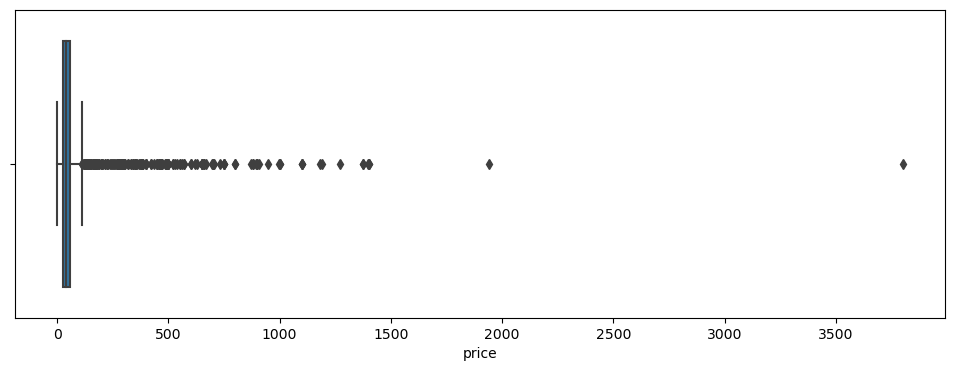

In [17]:
# Visualizing the distribution of price
plt.figure(figsize=(12,4))
sns.boxplot(x=df_eda['price'])

<Axes: xlabel='category', ylabel='count'>

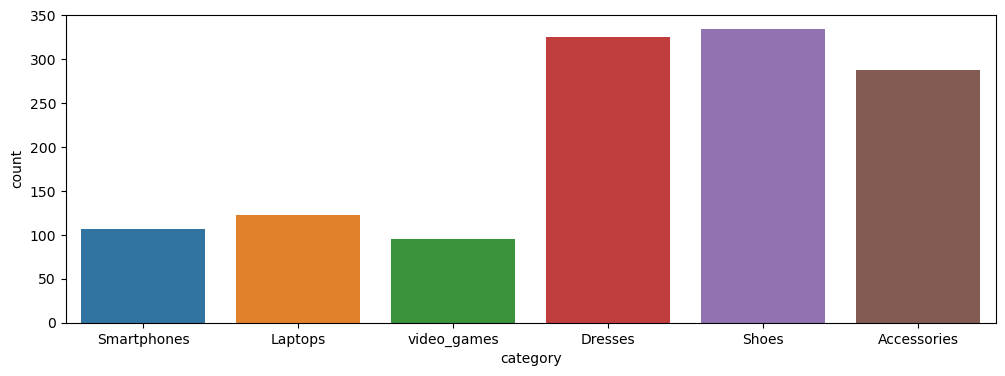

In [18]:
# Customer purchase across categories
plt.figure(figsize=(12,4))
sns.countplot(data=df_eda, x='category')

<Axes: xlabel='star_ratings'>

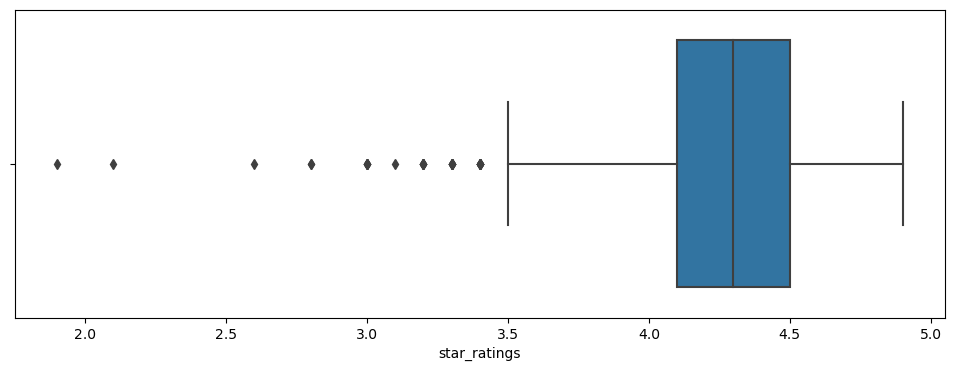

In [19]:
# Star rating distribution
plt.figure(figsize=(12,4))
sns.boxplot(x=df_eda['star_ratings'])

<Axes: xlabel='category', ylabel='star_ratings'>

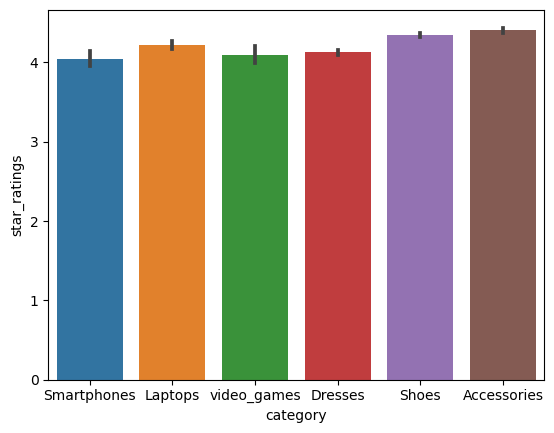

In [20]:
sns.barplot(data=df_eda, x='category', y='star_ratings')